# Credit Card Default Payment Prediction 

A classification model to predict default payment next month. The dataset sourced from Google Big Query, this project just using column limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month. You can see the SQL query that use to get the columns.

Datset source : https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table

# Query SQL

In [1]:
# SELECT limit_balance,
# CAST(sex AS INT64) AS sex,
# CAST(education_level AS INT64) AS education_level,
# CAST(marital_status AS INT64) AS marital_status,
# age, pay_0, pay_2, pay_3, pay_4,
# CAST(pay_5 AS FLOAT64) AS pay_5,
# CAST(pay_6 AS FLOAT64) AS pay_6,
# bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
# CAST(default_payment_next_month AS INT64) AS default_payment_next_month,
# FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 52026

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

!pip install feature-engine
from feature_engine.outliers import Winsorizer

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Loading

In [4]:
# Read Data CSV
df = pd.read_csv("/content/drive/MyDrive/Hactiv8/P1G5_Set_1_masayu.csv")
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [5]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


Insight :
The credit_card_default dataset collects information about default credit cards. From this dataset,  there is information about several columns containing:

* limit balance : The limit balance of the amount of credit given in dollars (including individual and family / additional credit)
* sex : gender (1=male, 2=female)
* education_level : education level/Education level (1 = Masters, 2 = * University, 3 = High School, 4 = other, 5 = unknown, 6 = unknown)
* marital_status : Marital status (1 = married, 2 = single, 3 = others)
* age : age or age in years
* pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly, 0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over)
* pay_2 : Payment status in August 2005 (same scale as above)
* pay_3 : Payment status in July 2005 (same scale as above)
* pay_4 : Payment status in June 2005 (same scale as above)
* pay_5 : Payment status in May 2005 (same scale as above)
* pay_6 : Payment status in April 2005 (same scale as above)
* bill_amt_1 : Total bill for September 2005 (NT dollar)
* bill_amt_2 : Total bill for August 2005 (NT dollar)
* bill_amt_3 : Total bill for July 2005 (NT dollar)
* bill_amt_4 : Total bill for June 2005 (NT dollar)
* bill_amt_5 : Total bill for May 2005 (NT dollar)
* bill_amt_6 : Total bill for April 2005 (NT dollar)
* pay_amt_1 : Amount of previous payment in September 2005 (NT dollars)
* pay_amt_2 : Amount of previous payment in August 2005 (NT dollars)
* pay_amt_3 : Amount of previous payment in July 2005 (NT dollars)
* pay_amt_4 : Amount of previous payment in June 2005 (NT dollars)
* pay_amt_5: Amount of previous payment in May 2005 (NT dollars)
* pay_amt_6: Amount of previous payment in April 2005 (NT dollars)
* default_payment_next_month: default payment next month (1=yes, 0=no)

In [6]:
#check shape of dataset
df.shape

(2965, 24)

In [7]:
#Check information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [8]:
# Check missing value
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

# Exploratory Data Analysis (EDA)



<Axes: ylabel='default_payment_next_month'>

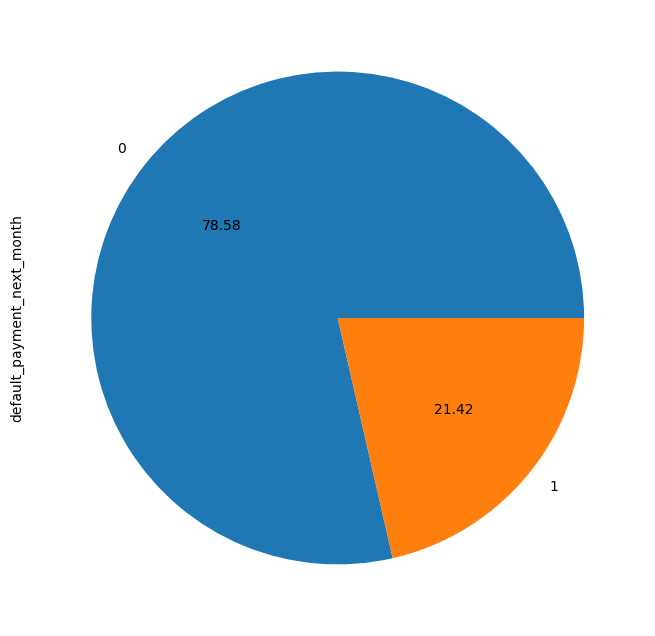

In [9]:
#visualization of default credit card features
df['default_payment_next_month'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Insight : Based on the visualization, can be seen that customers who use credit cards are more dominant at 78.58% who do not default on all expenditures made by customers. Meanwhile, credit card users who only made default payments were 21.42%. From that, we should consider targeted marketing strategies to encourage non-credit card users to adopt credit cards.

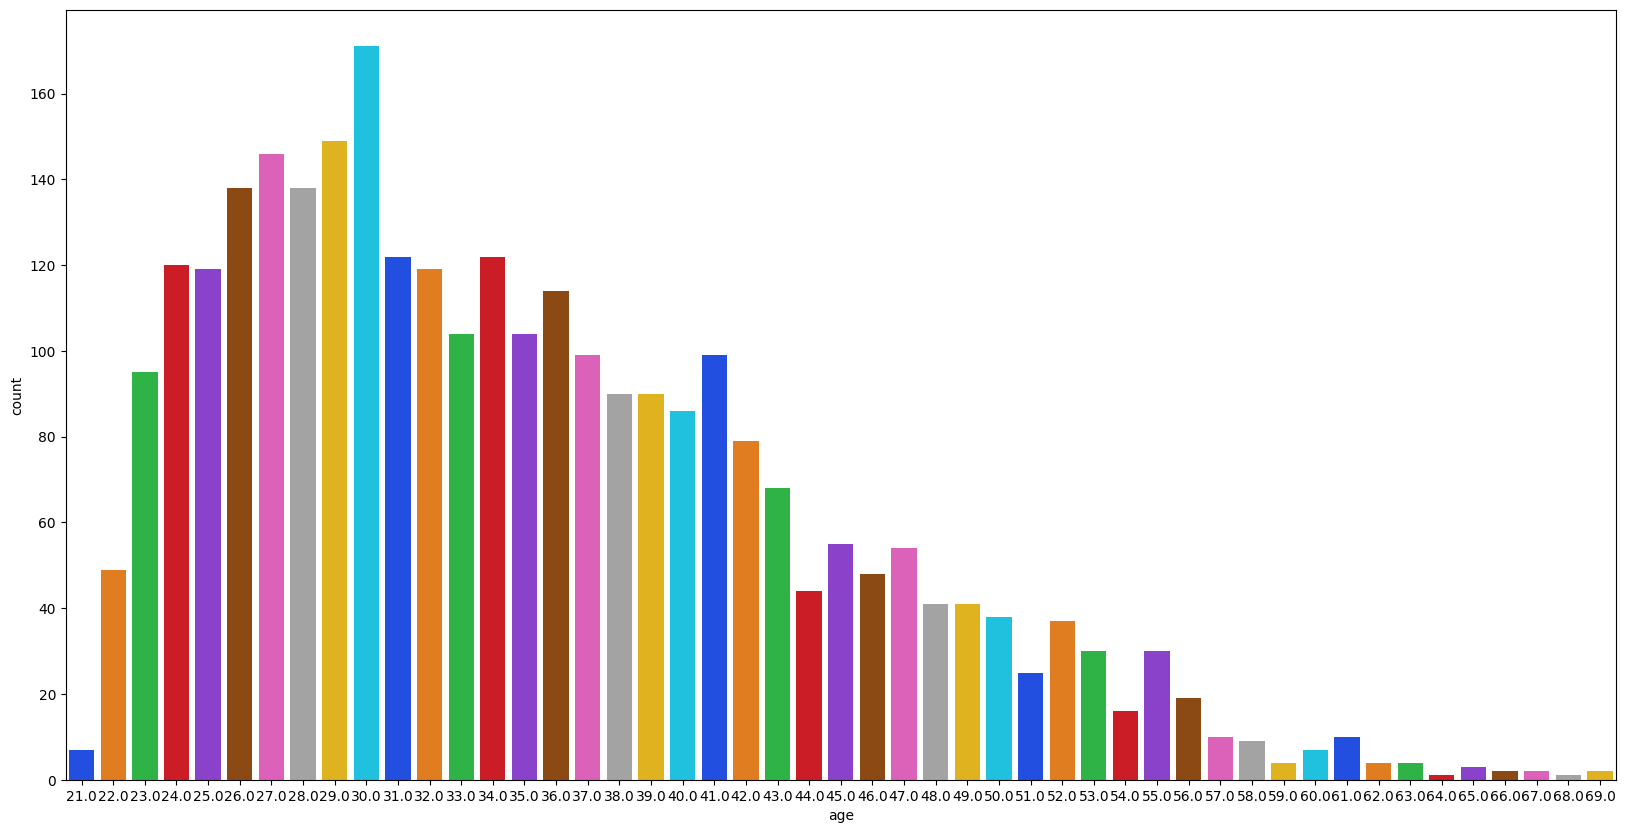

In [10]:
#visualization of age
plt.figure(figsize=(20, 10))
sns.countplot(x='age', data=df, palette="bright")
plt.show()

Insight : Based on the visualization of gender, can be seen that the highest credit card users are used by the age group of 25 to 31 years.

In [11]:
ms_lb = df.groupby(by='marital_status')[['limit_balance']].mean()
ms_lb

,limit_balance
marital_status,
0,115000.000000
1,179534.534535
2,151035.131744
3,115428.571429


<Axes: ylabel='marital_status'>

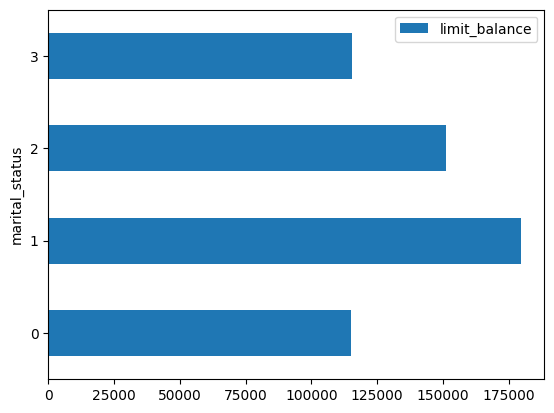

In [12]:
ms_lb.plot(kind='barh')

Insight : Among those classified as married, the credit card transaction fees tend to be higher, indicating a larger balance limit. Married individuals typically incur substantial living expenses. Singles come in second place, following behind are individuals with divorced marital status and others.

In [13]:
#Feature Division
pay_data = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
by_data = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
                  'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']

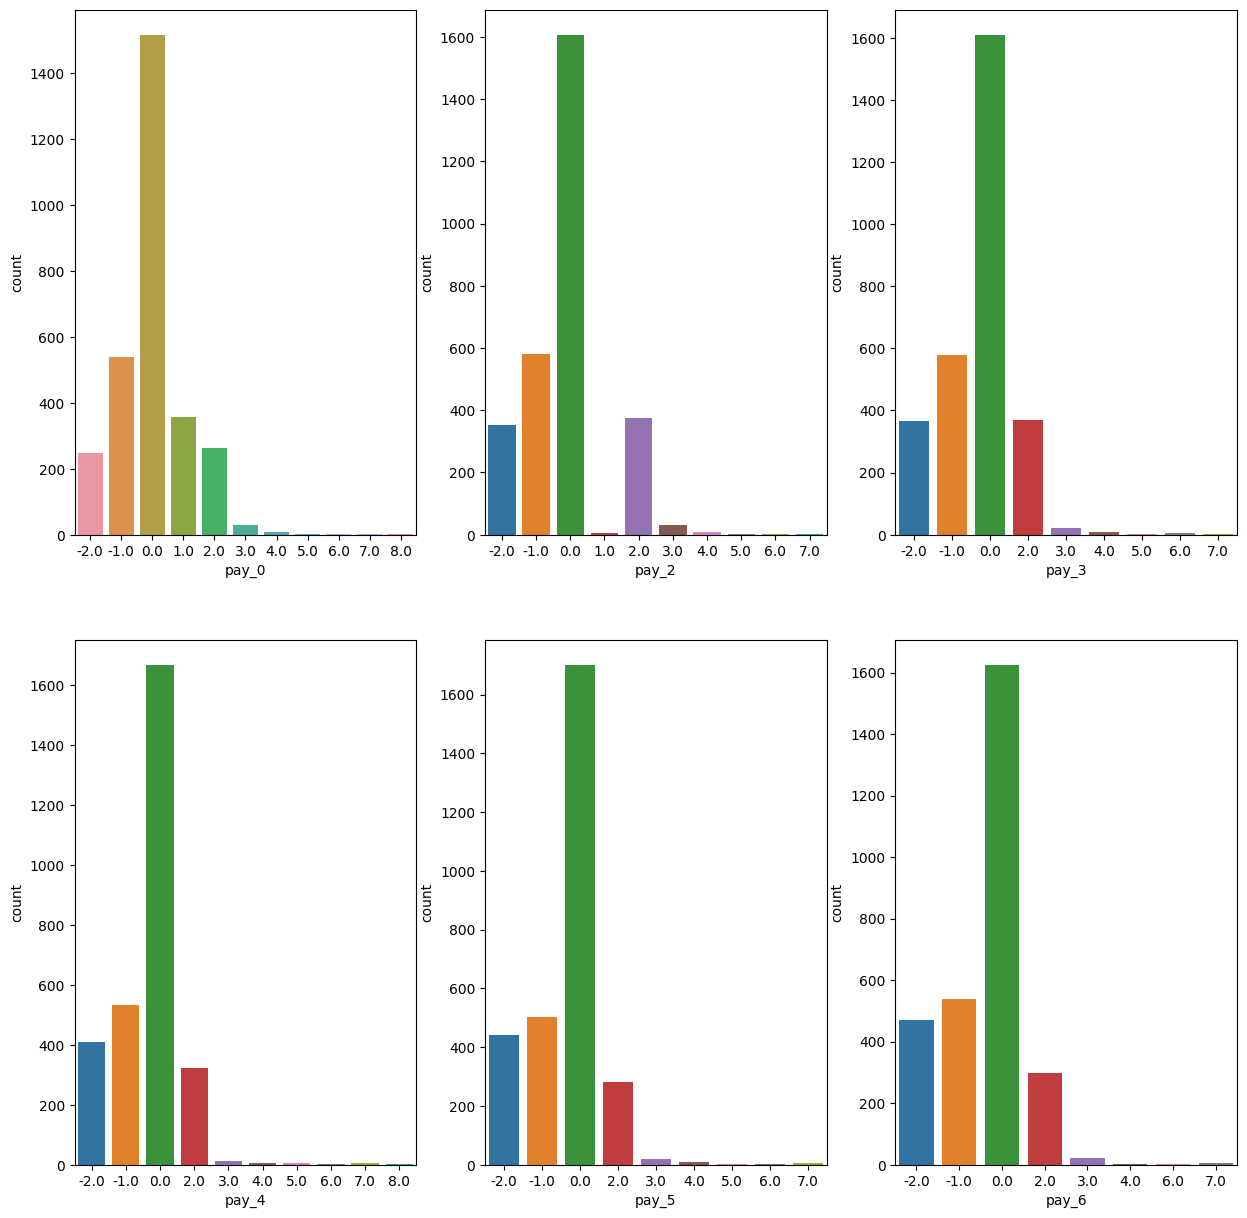

In [14]:
# Visualization of categorical feature
plt.figure(figsize=(15, 15))
for i,cat in enumerate(pay_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data = df, x= cat)
plt.show()

Insight : Description of the repayment data that the index measurement and its description are -2 = no consumption, -1 = pay fairly, 0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over.

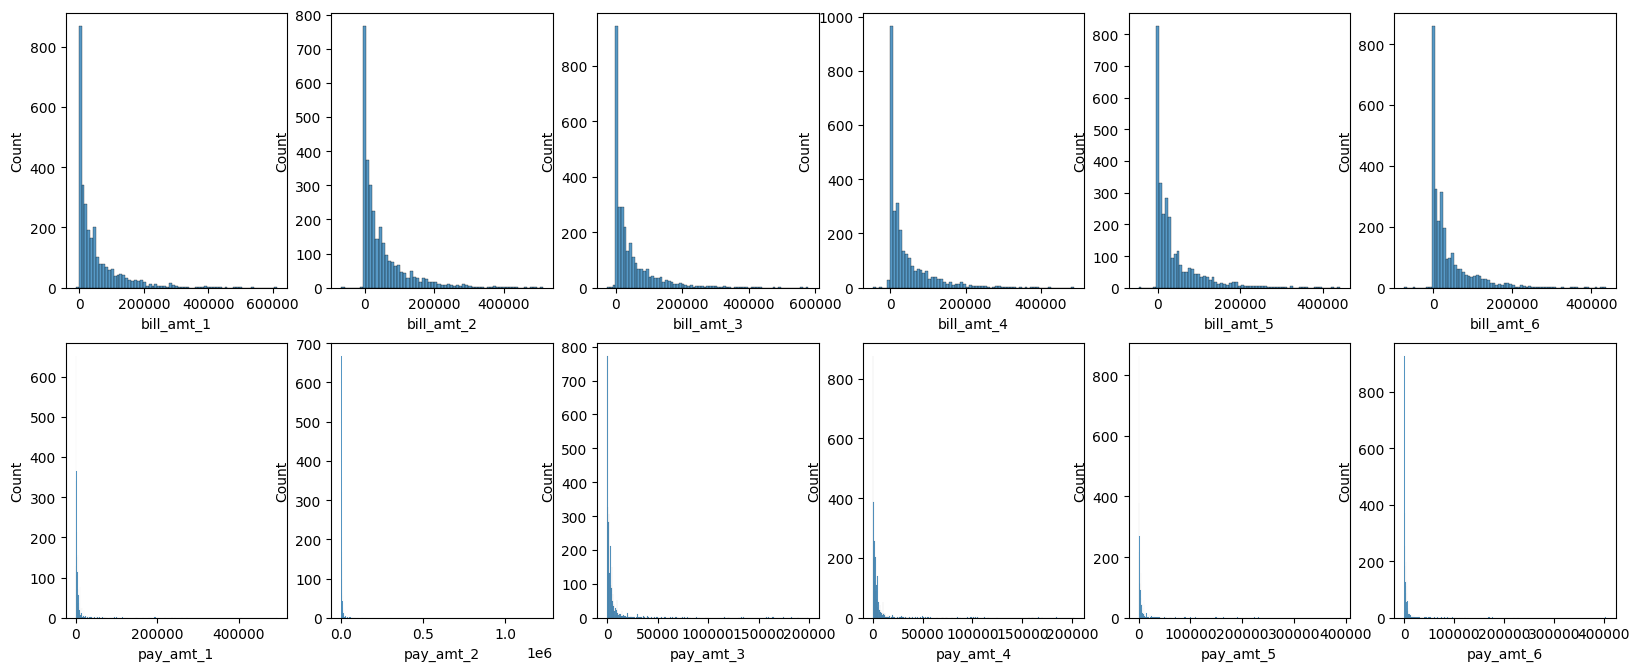

In [15]:
## Visualization of numerical feature
plt.figure(figsize=(20,25))
for j,num in enumerate(by_data):
    plt.subplot(6, 6, j+1)
    sns.histplot(data = df, x= num, multiple="stack")
plt.show()

Insight : For features bill_amt1-bill_amt_6 is total bill for April 2005-September 2005 (NT dollar) then for pay_amt_1-6 are total amount of previous payment in April 2005-September 2005 (NT dollars)

In [16]:
dp_bill = df.groupby('default_payment_next_month').mean()[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']]
dp_bill

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
default_payment_next_month,,,,,,
0,52343.348069,50616.744635,48277.999142,44242.142060,40775.722318,39590.152361
1,51292.557480,50768.069291,48099.437795,43530.267717,41617.867717,40444.259843


<Axes: xlabel='default_payment_next_month'>

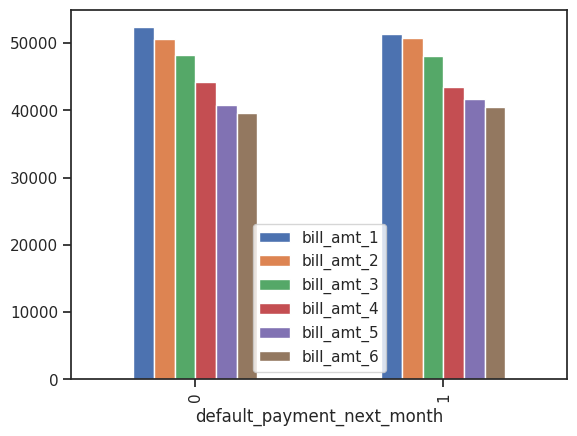

In [17]:
sns.set_theme(style="ticks")
dp_bill.plot(kind='bar')

Insight : The average number of invoices that were not made from the default payment in April(Bill_amt_6) was 39590 NT dollars, May(Bill_amt_5) was 40775 NT dollars, June(Bill_amt_4) was 44242 NT dollars, July(Bill_amt_3) was 48277 NT ​​dollars, August(Bill_amt_2) was 50616 NT dollars and September(Bill_amt_1) was 52343 NT dollars. This indicates that default payments did not make the average billing amount from April to September 2005 for the previous month.

In [18]:
dp_pay=df.groupby('default_payment_next_month').mean()[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]
dp_pay

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
default_payment_next_month,,,,,,
0,7070.179399,7165.855794,5823.500429,4933.536481,5491.157940,5986.556652
1,3702.329134,2994.491339,2681.051969,3195.811024,2792.908661,3166.981102


<Axes: xlabel='default_payment_next_month'>

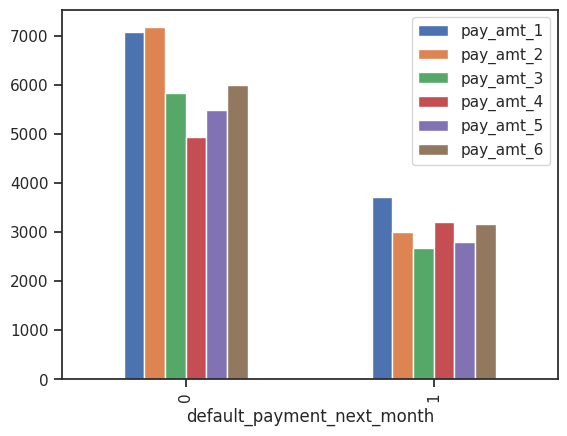

In [19]:
dp_pay.plot(kind='bar')

Insight : The average amount of fees/payments made from the default payment in April(Payment ATM_6) of 3166 NT dollars, May(Payment ATM_5) of 2792 NT dollars, June(Payment ATM_4) of 3195 NT dollars, July(Payment ATM_3) of 2681 NT dollars, August(Payment ATM_2) was 2994 NT dollars and September(Payment ATM_1) was 3702 NT dollars. This indicates that the average number of fees/payments from April to September 2005 has defaulted for the previous month.

# Feature Engineering

Split dataset

In [20]:
#Separation of `X` and `y`
X = df.drop('default_payment_next_month', axis=1)
y = df['default_payment_next_month']

In [21]:
# #Separation of `X` and `y`
# X = new_data.drop('default_payment_next_month', axis=1)
# y = new_data['default_payment_next_month']

In [22]:
#Split between Train-Set and Test-Set
#Entering x and y values, test_size means split 80% for train, and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2372, 23)
Test Size :  (593, 23)


##Check correlation

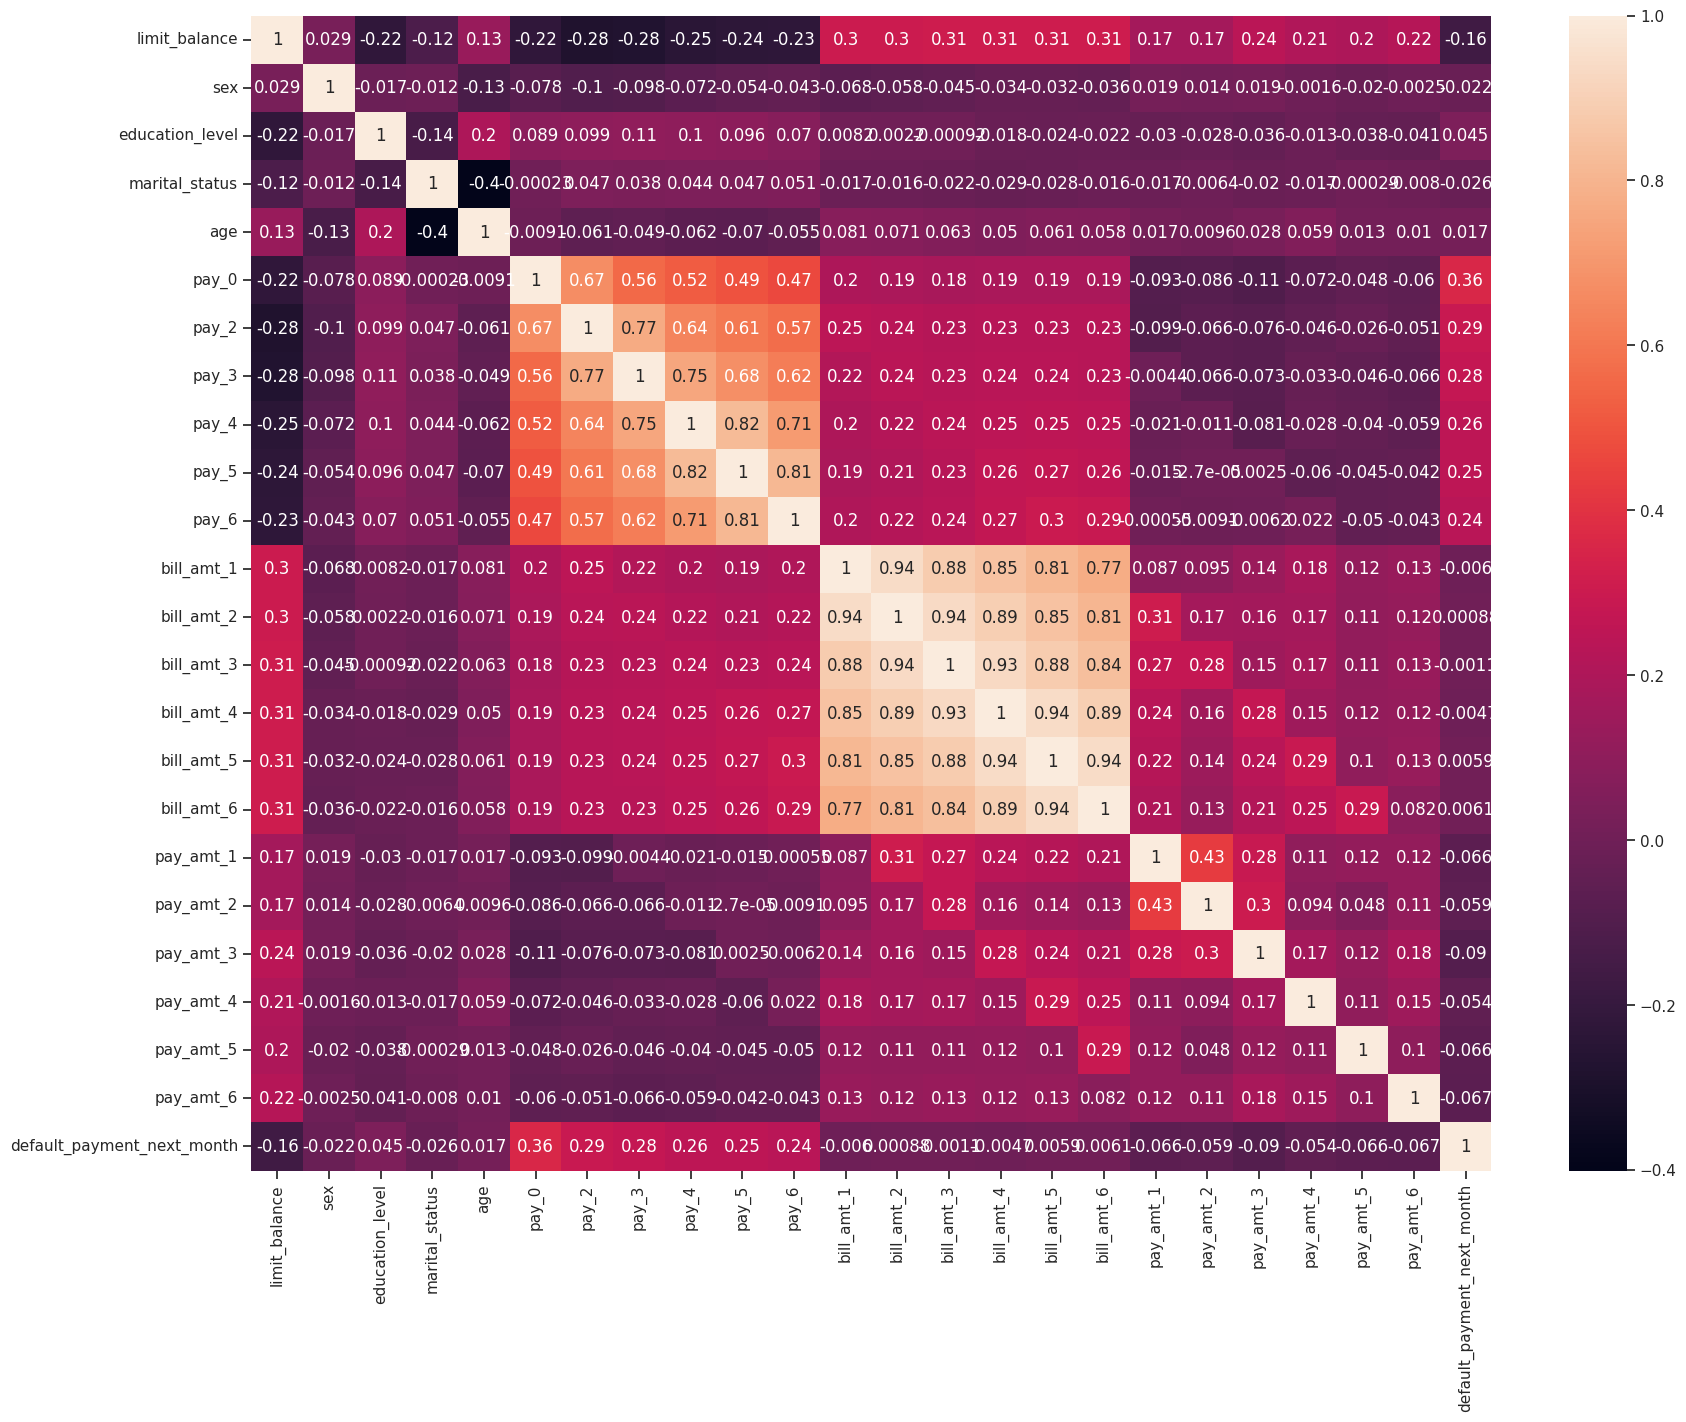

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

Insight : Based on the correlation result, limit_balance, pay_0, pay_2, pay_3, pay_4, pay_5, and pay_6 have a better correlation score with default_payment_next_month than the other features. But to be more convincing, we employ feature selection techniques to identify the best features with the target variable. Feature selection will help to choose the most relevant features that contribute the most to predicting the target variable.

In [24]:
# Assuming X_train and y_train are your feature and target matrices
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Melihat nilai score hasil training untuk masing-masing fitur
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance

pay_0              0.116842
age                0.058290
limit_balance      0.056251
bill_amt_1         0.052507
pay_2              0.050744
pay_amt_6          0.049520
bill_amt_3         0.049245
bill_amt_5         0.046899
bill_amt_2         0.046398
bill_amt_6         0.046241
pay_amt_2          0.045667
pay_amt_1          0.045524
bill_amt_4         0.045091
pay_amt_3          0.043459
pay_amt_4          0.042811
pay_amt_5          0.042267
pay_3              0.039361
pay_5              0.029526
pay_6              0.024783
pay_4              0.023377
education_level    0.019751
marital_status     0.013911
sex                0.011533
dtype: float64

Insight : The top features that have the highest importance scores are pay_0, age, limit_balance, and bill_amt_1 columns. Based on these results, these six features will be used. The remaining features will be dropped because it is suspected that is not very good at influencing the default payment target.

In [25]:
# Remove unused features
X_train.drop(['bill_amt_6','bill_amt_2','bill_amt_5','bill_amt_3','pay_amt_1',
              'pay_amt_5','bill_amt_4','pay_amt_3','pay_amt_4','pay_amt_2','pay_amt_6', 'pay_2',
              'pay_3','pay_5','pay_6','pay_4','education_level','marital_status',
              'sex'], axis=1, inplace=True)
X_test.drop(['bill_amt_6','bill_amt_2','bill_amt_5','bill_amt_3','pay_amt_1',
              'pay_amt_5','bill_amt_4','pay_amt_3','pay_amt_4','pay_amt_2', 'pay_amt_6', 'pay_2',
              'pay_3','pay_5','pay_6','pay_4','education_level','marital_status',
              'sex'], axis=1, inplace=True)

## Cardinality

In [26]:
print('Number of categories in the variable limit balance     : {}'.format(len(df.limit_balance.unique())))
print('Number of categories in the variable age      : {}'.format(len(df.age.unique())))
print('Number of categories in the variable pay_0   : {}'.format(len(df.pay_0.unique())))
print('Number of categories in the variable bill_amt_1   : {}'.format(len(df.bill_amt_1.unique())))

Number of categories in the variable limit balance     : 59
Number of categories in the variable age      : 49
Number of categories in the variable pay_0   : 11
Number of categories in the variable bill_amt_1   : 2643


## Check and Handle Outliers

In [27]:
# Create histogram and boxplot for visualize price and skewness value
def diagnostic_plots(df, variable):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(y=df[variable])
    plt.title('Skewness of Numerical Columns')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df
    [variable])
    plt.title('Outliers')
    plt.show()

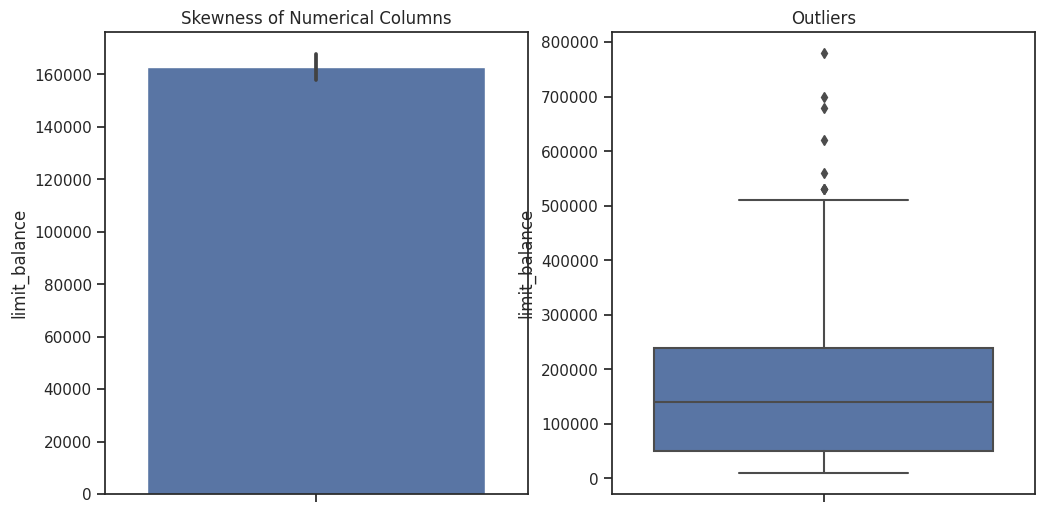


Skewness Value limit_balance :  0.9505914350917036


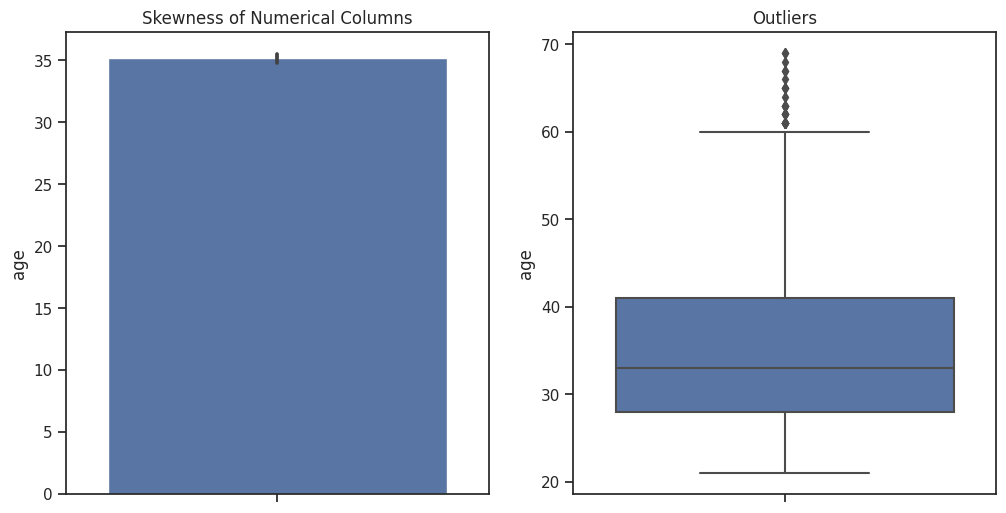


Skewness Value age :  0.7944215519850881


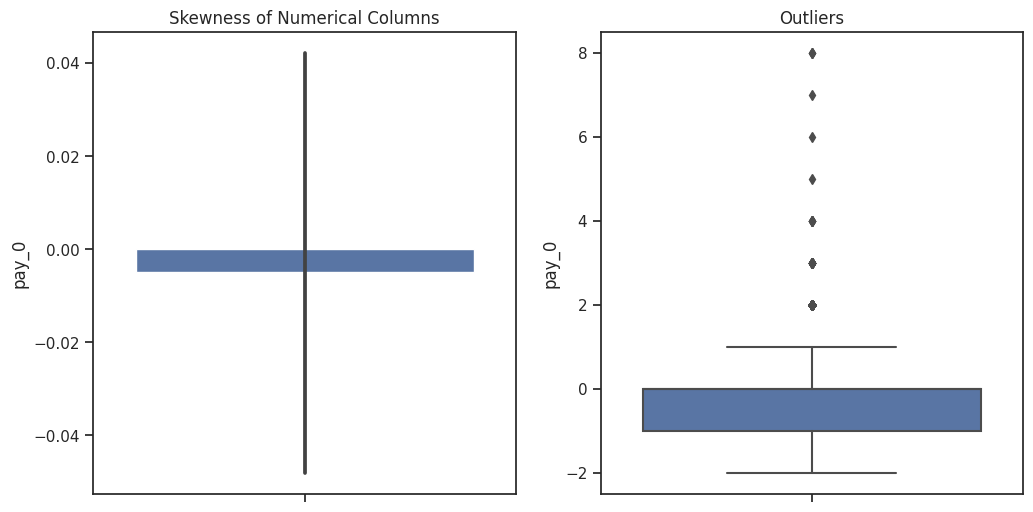


Skewness Value pay_0 :  0.9752785176600952


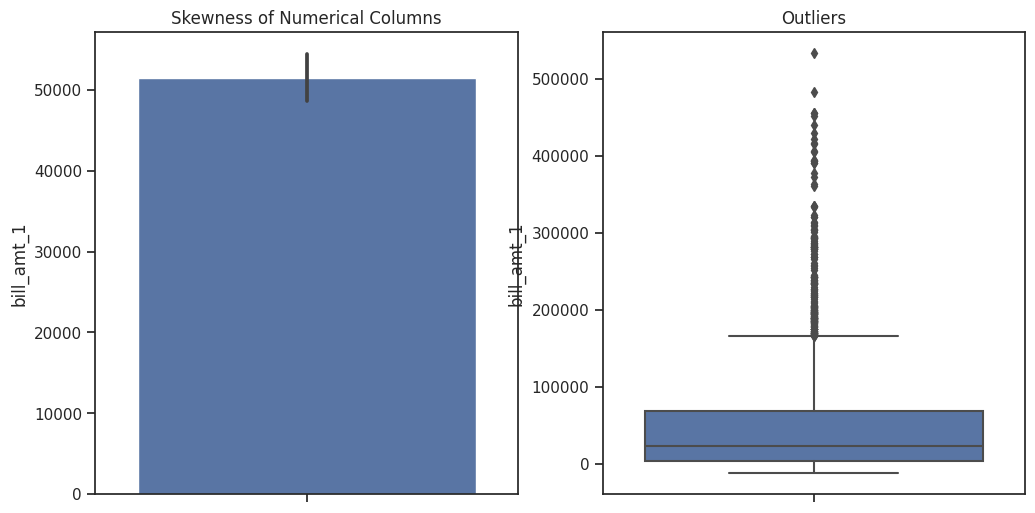


Skewness Value bill_amt_1 :  2.4086848735696096


In [28]:
# Check distribution of features and outliers using Boxplot
diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value limit_balance : ', X_train['limit_balance'].skew())

diagnostic_plots(X_train, 'age')
print('\nSkewness Value age : ', X_train['age'].skew())

diagnostic_plots(X_train, 'pay_0')
print('\nSkewness Value pay_0 : ', X_train['pay_0'].skew())

diagnostic_plots(X_train, 'bill_amt_1')
print('\nSkewness Value bill_amt_1 : ', X_train['bill_amt_1'].skew())

Insight :
* The features include limit_balance, age, and pay_0 they exhibit normal distribution as indicated by their skewness values conforming to the standard. However, the feature bill_amt_1 contains non-normally distributed data, evidenced by a skewness value deviating from the standard. Consequently, the IQR value will be determined initially to standardize the range of values for boxplot inclusion, aiming to achieve a normal distribution of the data.
* There are outliers in the upper boxplot/top boxplot, so we're gonna handle it using winsorizer.By Winsorizing, we can maintain the distributional characteristics of the data while reducing the impact of extreme values.

In [29]:
# Create a Winsorizer object with specified parameters
winsorizer = Winsorizer(capping_method='iqr',
                        tail='both',
                        fold=1.5,
                        variables=['limit_balance', 'age', 'pay_0', 'bill_amt_1'])

# Fit the Winsorizer on the training data
winsorizer.fit(X_train)

# Transform the training data by applying Winsorizing
X_train_n = winsorizer.transform(X_train)



limit_balance - After Handling Outlier

Skewness Value limit_balance :  0.8815608228069661


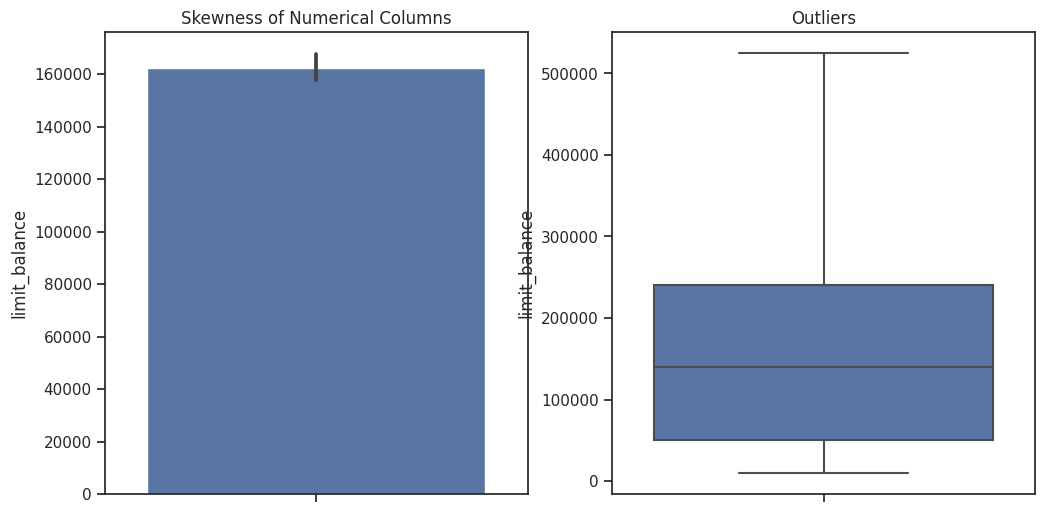


age - After Handling Outlier

Skewness Value age :  0.7249598762072709


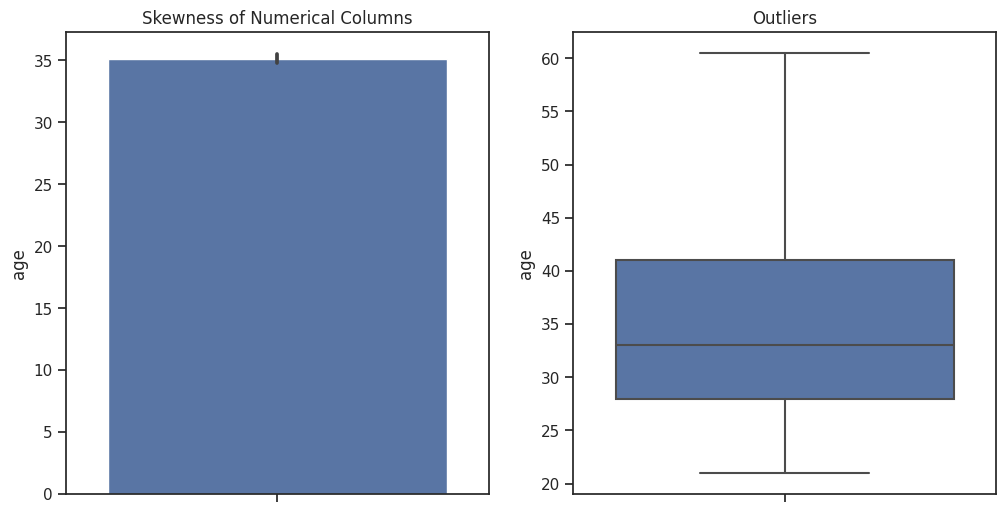


pay_0 - After Handling Outlier

Skewness Value pay_0 :  -0.23382693308766533


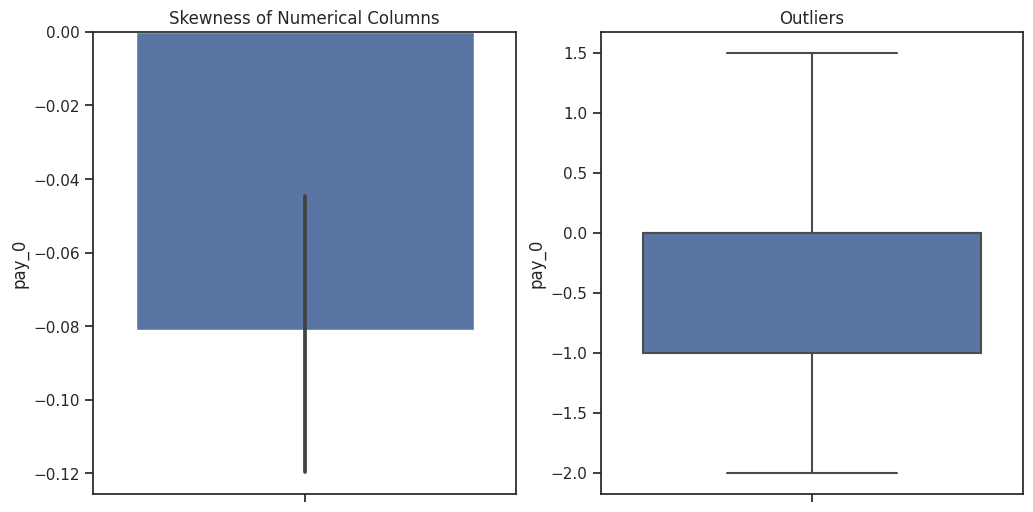


bill_amt_1 - After Handling Outlier

Skewness Value bill_amt_1 :  1.2036045756909075


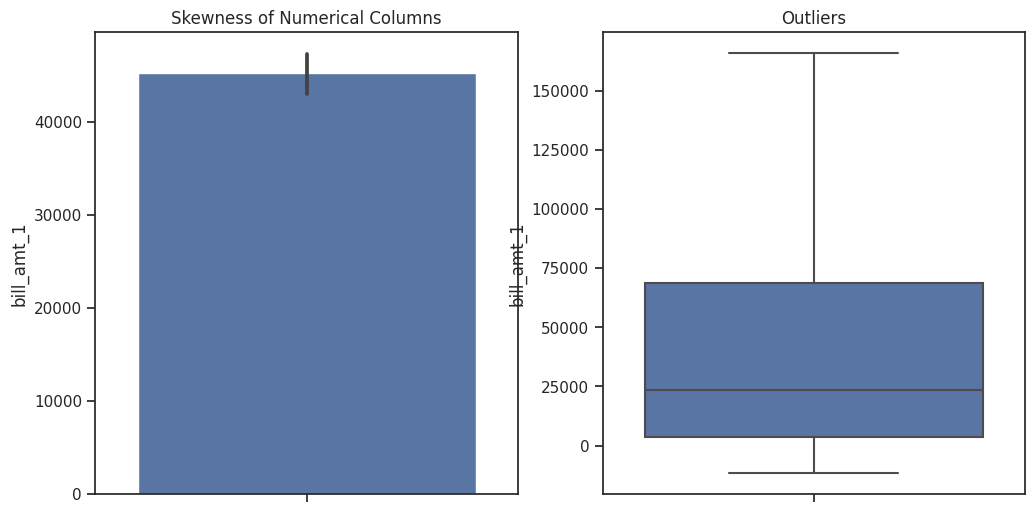

In [30]:
# Visualization After Handling Outlier
print('\nlimit_balance - After Handling Outlier')
print('\nSkewness Value limit_balance : ', X_train_n['limit_balance'].skew())
diagnostic_plots(X_train_n, 'limit_balance')

print('\nage - After Handling Outlier')
print('\nSkewness Value age : ', X_train_n['age'].skew())
diagnostic_plots(X_train_n, 'age')

print('\npay_0 - After Handling Outlier')
print('\nSkewness Value pay_0 : ', X_train_n['pay_0'].skew())
diagnostic_plots(X_train_n, 'pay_0')

print('\nbill_amt_1 - After Handling Outlier')
print('\nSkewness Value bill_amt_1 : ', X_train_n['bill_amt_1'].skew())
diagnostic_plots(X_train_n, 'bill_amt_1')


Insight :  The oulier data no longer exists, also the skewness value for feature bill_amt_1 is already normal.

In [31]:
X_train_n

,limit_balance,age,pay_0,bill_amt_1
48,310000.0,45.0,0.0,165897.625
2697,100000.0,55.0,1.5,435.000
1768,100000.0,29.0,0.0,73742.000
2482,360000.0,34.0,1.0,0.000
2806,200000.0,34.0,1.0,0.000
...,...,...,...,...
2009,20000.0,36.0,1.5,24166.000
1180,50000.0,57.0,0.0,50990.000
1344,80000.0,24.0,0.0,39813.000
527,150000.0,49.0,0.0,151822.000


## Feature Division

In [32]:
# Feature Division
num_data = ['limit_balance', 'age', 'bill_amt_1']
cat_data = ['pay_0']

print('Num Columns : ', num_data)
print('Cat Columns : ', cat_data)


Num Columns :  ['limit_balance', 'age', 'bill_amt_1']
Cat Columns :  ['pay_0']


##Split data numerical & categorical

In [33]:
#Split train set and test set based on column types

X_train_num = X_train[num_data]
X_train_cat = X_train[cat_data]

X_test_num = X_test[num_data]
X_test_cat = X_test[cat_data]

X_train_num

,limit_balance,age,bill_amt_1
48,310000.0,45.0,313268.0
2697,100000.0,55.0,435.0
1768,100000.0,29.0,73742.0
2482,360000.0,34.0,0.0
2806,200000.0,34.0,0.0
...,...,...,...
2009,20000.0,36.0,24166.0
1180,50000.0,57.0,50990.0
1344,80000.0,24.0,39813.0
527,150000.0,49.0,151822.0


##Feature Scaling

In [34]:
X_train_num.describe()

,limit_balance,age,bill_amt_1
count,2372.000000,2372.000000,2372.000000
mean,162803.541315,35.178752,51545.029089
std,124310.763584,9.140734,71968.848780
min,10000.000000,21.000000,-11545.000000
25%,50000.000000,28.000000,3780.750000
50%,140000.000000,33.000000,23565.500000
75%,240000.000000,41.000000,68627.500000
max,780000.000000,69.000000,533142.000000


In [35]:
#Feature scaling using MinmaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.38961039, 0.5       , 0.59632964],
       [0.11688312, 0.70833333, 0.02199428],
       [0.11688312, 0.16666667, 0.15657983],
       ...,
       [0.09090909, 0.0625    , 0.09428901],
       [0.18181818, 0.58333333, 0.29992822],
       [0.01298701, 0.45833333, 0.0548113 ]])

## Encoding

In [36]:
X_train_cat

,pay_0
48,0.0
2697,2.0
1768,0.0
2482,1.0
2806,1.0
...,...
2009,8.0
1180,0.0
1344,0.0
527,0.0


In [37]:
# Using OneHotEncoder in scikit-learn
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)
X_train_cat_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Concatenate numerical and encoded categorical columns
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)

# Create dataframe of X_train_final
column_names = num_data + encoder.get_feature_names_out(cat_data).tolist()
X_train_final_df = pd.DataFrame(X_train_final, columns=column_names)


In [39]:
X_train_final_df

,limit_balance,age,bill_amt_1,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_6.0,pay_0_7.0,pay_0_8.0
0,0.389610,0.500000,0.596330,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.116883,0.708333,0.021994,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.116883,0.166667,0.156580,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.454545,0.270833,0.021196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.270833,0.021196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,0.012987,0.312500,0.065562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2368,0.051948,0.750000,0.114809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2369,0.090909,0.062500,0.094289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2370,0.181818,0.583333,0.299928,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Inference

Inference data is original data that will be used to test previously created models. The data used must be in the original format, not data that has been scaled, therefore the data will be separated first.

In [40]:
data_infernce = X_train_final_df.sample(10, random_state=15)
data_infernce

,limit_balance,age,bill_amt_1,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_6.0,pay_0_7.0,pay_0_8.0
1645,0.285714,0.145833,0.076532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2089,0.181818,0.145833,0.021196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,0.025974,0.583333,0.053631,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1618,0.181818,0.145833,0.073365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.051948,0.416667,0.111892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2297,0.246753,0.958333,0.021196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2239,0.012987,0.541667,0.047984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
826,0.090909,0.208333,0.170562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2156,0.636364,0.208333,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
765,0.142857,0.500000,0.138531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Remove Inference Set from Data Set
data = data_infernce.drop(data_infernce.index)
data

,limit_balance,age,bill_amt_1,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_6.0,pay_0_7.0,pay_0_8.0


In [42]:
# Reset Index
# In order to avoid unwanted occurrences, the data is reset its index for sequencing
data.reset_index(drop=True, inplace=True)
data_infernce.reset_index(drop=True, inplace=True)
data_infernce

,limit_balance,age,bill_amt_1,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_6.0,pay_0_7.0,pay_0_8.0
0,0.285714,0.145833,0.076532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.181818,0.145833,0.021196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.025974,0.583333,0.053631,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181818,0.145833,0.073365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.051948,0.416667,0.111892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.246753,0.958333,0.021196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.012987,0.541667,0.047984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.090909,0.208333,0.170562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.636364,0.208333,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.142857,0.500000,0.138531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
data_infernce.shape

(10, 14)

# Model Definition

In this Graded Challenge will use 4 models, they are Logistic Regression, KNN and Support Vector Machine(SVM). We will make 2 models for each algorithm, one is for default model and one using hyperparameter tuning. Also for the metrics evaluation will use Accuracy, Precision, Recall, and F1 Score.

In [44]:
logreg = LogisticRegression()

logreg.fit(X_train_final, y_train)

LogisticRegression()

In [45]:
# Training using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final, y_train)

KNeighborsClassifier()

In [46]:
# Training using Linear SVM
%%time
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_final, y_train)

CPU times: user 322 ms, sys: 52.6 ms, total: 375 ms
Wall time: 365 ms


SVC()

# Model Training

## Logistic Regression Model

-------------------------------

**Default Parameter**

In [47]:
# Logistic Regression with Default Parameters
print("Logistic Regression with Default Parameters")

# Create and train the logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train)

# Make predictions on the traib set
y_train_def_lr = logreg.predict(X_train_final)
scoreslog = cross_val_score(logreg, X_train_final, y_train, cv=5, scoring='accuracy')

# Evaluate the model
print('Accuracy score train : ',accuracy_score(y_train,y_train_def_lr))
print("Best Cross Validation score      :",scoreslog.mean())

Logistic Regression with Default Parameters
Accuracy score train :  0.8381112984822934
Best Cross Validation score      : 0.8372667110815012


**Hyperparameter Tuning**

In [48]:
# Logistic Regression with Hyperparameter Tuning
print("\nLogistic Regression with Hyperparameter Tuning")

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['liblinear', 'lbfgs', 'newton-cg']
}

# Create and train the logistic regression model with hyperparameter tuning
logreg_tuned = LogisticRegression()
grid_search = GridSearchCV(logreg_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_logreg = grid_search.best_estimator_
y_train_tuned = best_logreg.predict(X_train_final)
scoreslog = cross_val_score(best_logreg, X_train_final, y_train, cv=5)

# Evaluate the model with hyperparameter tuning
print(f"Best Hyperparameters: {best_params}")
print('Accuracy score train : ',accuracy_score(y_train,y_train_tuned))
print("Best Cross Validation score      :",scoreslog.mean())


Logistic Regression with Hyperparameter Tuning
Best Hyperparameters: {'C': 1.0, 'solver': 'liblinear'}
Accuracy score train :  0.8381112984822934
Best Cross Validation score      : 0.8372667110815012


Insight : After doing hyperparameter using Gridsearch, we conclude that the best parameters are the C: 1,0 and best solver: 'liblinear'. All the best parameters will be used in model evaluation.

------------------------------

## KNN Model

**Using Default Parameter**

In [49]:
# KNN with Default Parameters
print("KNN with Default Parameters")

# Create and train the KNN model with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final, y_train)

# Make predictions on the train set
y_train_def_knn = knn_model.predict(X_train_final)
scoresknn = cross_val_score(knn_model, X_train_final, y_train, cv=5,scoring='accuracy')

# Evaluate the model
print('Accuracy score train : ',accuracy_score(y_train,y_train_def_knn))
print("Best Cross Validation score      :",scoresknn.mean())

KNN with Default Parameters
Accuracy score train :  0.8608768971332209
Best Cross Validation score      : 0.8123988452143015


**Hyperparameter Tuning**

In [50]:
#KNN with Hyperparameter Tuning
print("\KNN with Hyperparameter Tuning")

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create and train the KNN model with hyperparameter tuning
knn_tuned = KNeighborsClassifier()
grid_search = GridSearchCV(knn_tuned, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_final, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the test set using the best model
best_knn = grid_search.best_estimator_
y_train_knn = best_knn.predict(X_train_final)
scoresknn = cross_val_score(best_knn, X_train_final, y_train, cv=5)

# Evaluate the model with hyperparameter tuning
print(f"Best Hyperparameters: {best_params}")
print('Accuracy score train : ',accuracy_score(y_train,y_train_knn))
print("Best Cross Validation score      :",scoresknn.mean())

\KNN with Hyperparameter Tuning
Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Accuracy score train :  0.8444350758853288
Best Cross Validation score      : 0.8220892738174552


Insight : After doing hyperparameter using Gridsearch, we conclude that the best parameters are the best n_neighbors: 9 , best p: 1, and best weight: 'uniform'. All the best parameters will be used in model evaluation.

------------

## SVM Model

**Default Parameter**

In [51]:
# SVM with Default Parameters
print("SVM with Default Parameters")

svm_model = SVC()
svm_model.fit(X_train_final, y_train)

# # Make predictions on the train set
y_train_def_svm = svm_model.predict(X_train_final)
scoressvm = cross_val_score(svm_model, X_train_final, y_train, cv=5)

# Evaluate the model
print('Accuracy score train : ',accuracy_score(y_train,y_train_def_svm))
print("Best Cross Validation score      :",scoressvm.mean())

SVM with Default Parameters
Accuracy score train :  0.8389544688026982
Best Cross Validation score      : 0.8376895403064623


**Hyperparameter Tuning**

In [52]:
#find kernel
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

svm_linear.fit(X_train_final, y_train)
svm_poly.fit(X_train_final, y_train)
svm_rbf.fit(X_train_final, y_train)

SVC()

In [53]:
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  return accuracy_score(y, y_pred)

In [54]:
print('SVM - Linear')
print('Train : ', performance_check(svm_linear, X_train_final, y_train))
print('')

print('SVM - Polynomial')
print('Train : ', performance_check(svm_poly, X_train_final, y_train))
print('')

print('SVM - RBF')
print('Train : ', performance_check(svm_rbf, X_train_final, y_train))
print('')

SVM - Linear
Train :  0.8389544688026982

SVM - Polynomial
Train :  0.8389544688026982

SVM - RBF
Train :  0.8389544688026982



In [55]:
#find C
svm_rbf_01 = SVC(kernel='rbf', C=0.1)
svm_rbf_1 = SVC(kernel='rbf', C=1)
svm_rbf_10 = SVC(kernel='rbf', C=10)

svm_rbf_01.fit(X_train_final, y_train)
svm_rbf_1.fit(X_train_final, y_train)
svm_rbf_10.fit(X_train_final, y_train)

SVC(C=10)

In [56]:
print('SVM - C=0.1')
print('Train : ', performance_check(svm_rbf_01, X_train_final, y_train))
print('')

print('SVM - C=1')
print('Train : ', performance_check(svm_rbf_1, X_train_final, y_train))
print('')

print('SVM - C=10')
print('Train : ', performance_check(svm_rbf_10, X_train_final, y_train))
print('')

SVM - C=0.1
Train :  0.8372681281618887

SVM - C=1
Train :  0.8389544688026982

SVM - C=10
Train :  0.8389544688026982



In [57]:
#find gamma
svm_rbf_500_1 = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_10 = SVC(kernel='rbf', C=1, gamma='auto')

svm_rbf_500_1.fit(X_train_final, y_train)
svm_rbf_10.fit(X_train_final, y_train)

SVC(C=1, gamma='auto')

In [58]:
print('SVM - gamma=scale')
print('Train : ', performance_check(svm_rbf_500_1, X_train_final, y_train))
print('')

print('SVM - gamma=auto')
print('Train : ', performance_check(svm_rbf_10, X_train_final, y_train))
print('')

SVM - gamma=scale
Train :  0.8389544688026982

SVM - gamma=auto
Train :  0.8372681281618887



Insight : After a manual search to find the best parameter for the svm model, we conclude that the best parameters are the best kernel: 'rbf' , best C: 1, and best gamma: 'scale'. All the best parameters will be used in model evaluation.

# Model Evaluation

## Logistic Regression Eval

**Default parameter evaluate**

In [59]:
# Logistic Regression with Default Parameters Evaluation
print("Logistic Regression with Default Parameters Evaluation")

# Create and train the logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train_final, y_train)

# Make predictions on the train & test set
y_train_def_lr = logreg.predict(X_train_final)
y_test_def_lr = logreg.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_def_lr))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_def_lr))

Logistic Regression with Default Parameters Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90      1863
           1       0.78      0.35      0.48       509

    accuracy                           0.84      2372
   macro avg       0.81      0.66      0.69      2372
weighted avg       0.83      0.84      0.81      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       467
           1       0.66      0.37      0.48       126

    accuracy                           0.83       593
   macro avg       0.76      0.66      0.69       593
weighted avg       0.81      0.83      0.81       593



In [60]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_train_def_lr , y_test, y_test_def_lr, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_def_lr),
      'train - recall' : recall_score(y_train, y_train_def_lr),
      'train - accuracy' : accuracy_score(y_train, y_train_def_lr),
      'train - f1_score' : f1_score(y_train, y_train_def_lr),
      'test - precision' : precision_score(y_test, y_test_def_lr),
      'test - recall' : recall_score(y_test, y_test_def_lr),
      'test - accuracy_score' : accuracy_score(y_test, y_test_def_lr),
      'test - f1_score' : f1_score(y_test, y_test_def_lr),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_train_def_lr, y_test, y_test_def_lr, 'Logistic Regression(Default Hyperparameter)')
pd.DataFrame(all_reports)

,Logistic Regression(Default Hyperparameter)
test - accuracy_score,0.826307
test - f1_score,0.477157
test - precision,0.661972
test - recall,0.373016
train - accuracy,0.838111
train - f1_score,0.478261
train - precision,0.775330
train - recall,0.345776


**Hyperparameter tuning evaluate**

Logistic Regression with Hyperparameter Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1863
           1       0.78      0.35      0.48       509

    accuracy                           0.84      2372
   macro avg       0.81      0.66      0.69      2372
weighted avg       0.83      0.84      0.81      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       467
           1       0.67      0.38      0.48       126

    accuracy                           0.83       593
   macro avg       0.76      0.66      0.69       593
weighted avg       0.81      0.83      0.81       593

Confusion Matrix      : 


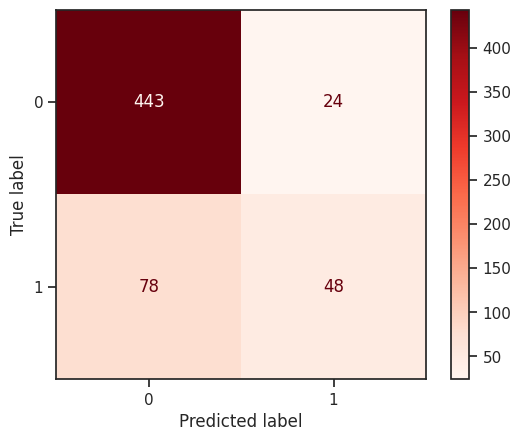

In [61]:
# Logistic Regression with Hyperparameter Evaluation
print("Logistic Regression with Hyperparameter Evaluation")

# Create and train the KNN model with hyperparameter tuning
logreg_best = LogisticRegression(C= 100.0, solver='liblinear')
logreg_best.fit(X_train_final, y_train)

# Make predictions on the test set using the best model
y_train_lr = logreg_best.predict(X_train_final)
y_test_lr = logreg_best.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_lr))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_lr))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_best, X_test_final, y_test, cmap='Reds'))

In [62]:
# Save Classification Report into a Dictionary
all_reports = performance_report(all_reports, y_train, y_train_lr, y_test, y_test_lr, 'Grid Search')
pd.DataFrame(all_reports)

,Logistic Regression(Default Hyperparameter),Grid Search
train - precision,0.775330,0.777293
train - recall,0.345776,0.349705
train - accuracy,0.838111,0.838954
train - f1_score,0.478261,0.482385
test - precision,0.661972,0.666667
test - recall,0.373016,0.380952
test - accuracy_score,0.826307,0.827993
test - f1_score,0.477157,0.484848


Insight :
* For Logistic Regression with default parameter we got 83% for train and 82%  for test.

* For Logistic Regression with grid search we got 83% prediction for train set and 82% for test set, can be seen that after using the best parameters the model accuracy results increase.

## KNN Model Eval

---------------------

**Default parameter evaluate**

In [63]:
# KNN with Default Parameters Evaluation
print("KNN with Default Parameters Evaluation")

# Create and train the KNN model with default parameters
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_train_def_knn = knn_model.predict(X_train_final)
y_test_def_knn = knn_model.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_def_knn))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_def_knn))

KNN with Default Parameters Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1863
           1       0.77      0.50      0.61       509

    accuracy                           0.86      2372
   macro avg       0.82      0.73      0.76      2372
weighted avg       0.85      0.86      0.85      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       467
           1       0.53      0.40      0.45       126

    accuracy                           0.80       593
   macro avg       0.69      0.65      0.67       593
weighted avg       0.78      0.80      0.79       593



In [64]:
# Save Classification Report into a Dictionary
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
all_reports = {}
def performance_report(all_reports, y_train, y_train_def_knn , y_test, y_test_def_knn, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_def_knn ),
      'train - recall' : recall_score(y_train, y_train_def_knn ),
      'train - accuracy' : accuracy_score(y_train, y_train_def_knn ),
      'train - f1_score' : f1_score(y_train, y_train_def_knn ),
      'test - precision' : precision_score(y_test, y_test_def_knn),
      'test - recall' : recall_score(y_test, y_test_def_knn),
      'test - accuracy_score' : accuracy_score(y_test, y_test_def_knn),
      'test - f1_score' : f1_score(y_test, y_test_def_knn),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_train_def_knn, y_test, y_test_def_knn, 'KNN(Default Hyperparameter)')
pd.DataFrame(all_reports)

,KNN(Default Hyperparameter)
test - accuracy_score,0.797639
test - f1_score,0.454545
test - precision,0.531915
test - recall,0.396825
train - accuracy,0.860877
train - f1_score,0.607143
train - precision,0.770393
train - recall,0.500982


**Hyperparameter tuning evaluate**

KNN with Hyperparameter Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1863
           1       0.77      0.45      0.57       509

    accuracy                           0.85      2372
   macro avg       0.82      0.71      0.74      2372
weighted avg       0.85      0.85      0.84      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       467
           1       0.57      0.40      0.47       126

    accuracy                           0.81       593
   macro avg       0.71      0.66      0.68       593
weighted avg       0.79      0.81      0.80       593

Confusion Matrix      : 


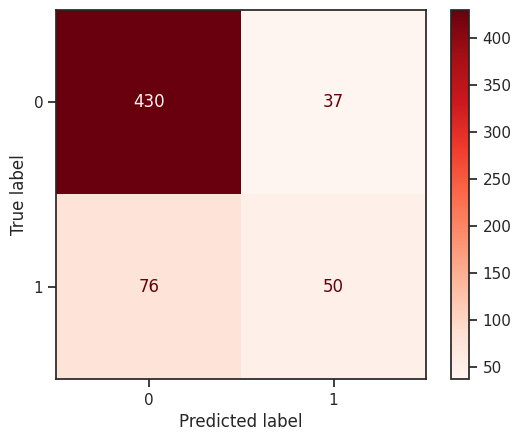

In [65]:
# KNN with Hyperparameter Evaluation
print("KNN with Hyperparameter Evaluation")

# Create and train the KNN model with hyperparameter tuning
knn_best = KNeighborsClassifier(n_neighbors=7,
                                 p= 1,
                                 weights= 'uniform')
knn_best.fit(X_train_final, y_train)

# Make predictions on the test set using the best model
y_train_knn = knn_best.predict(X_train_final)
y_test_knn = knn_best.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_knn))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_knn))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_best, X_test_final, y_test, cmap='Reds'))

In [66]:
# Save Classification Report into a Dictionary
all_reports = performance_report(all_reports, y_train, y_train_knn, y_test, y_test_knn, 'Grid Search')
pd.DataFrame(all_reports)

,KNN(Default Hyperparameter),Grid Search
train - precision,0.770393,0.772575
train - recall,0.500982,0.453831
train - accuracy,0.860877,0.854132
train - f1_score,0.607143,0.571782
test - precision,0.531915,0.574713
test - recall,0.396825,0.396825
test - accuracy_score,0.797639,0.809444
test - f1_score,0.454545,0.469484


Insight : On default parameter model we got 86% train and 79% test set, grid Search helped improve certain aspects of the model's performance, especially in terms of precision and F1 score on both training and testing sets. However, there was a decrease in recall, indicating a balance between precision and recall needs to be considered. The overall accuracy also showed a slight improvement after Grid Search.

## SVM Model Eval

**Default parameter evaluate**

In [67]:
# svm with Default Parameters Evaluation
print("svm with Default Parameters Evaluation")

svm_model = SVC()
svm_model.fit(X_train_final, y_train)

# # Make predictions on the test set
y_train_def_svm = svm_model.predict(X_train_final)
y_test_def_svm = svm_model.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_def_svm))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_def_svm))

svm with Default Parameters Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1863
           1       0.77      0.35      0.48       509

    accuracy                           0.84      2372
   macro avg       0.81      0.66      0.69      2372
weighted avg       0.83      0.84      0.81      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       467
           1       0.67      0.38      0.48       126

    accuracy                           0.83       593
   macro avg       0.76      0.66      0.69       593
weighted avg       0.81      0.83      0.81       593



In [68]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_train_def_svm, y_test, y_test_def_svm, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_train_def_svm),
      'train - recall' : recall_score(y_train, y_train_def_svm),
      'train - accuracy' : accuracy_score(y_train, y_train_def_svm),
      'train - f1_score' : f1_score(y_train, y_train_def_svm),
      'test - precision' : precision_score(y_test, y_test_def_svm),
      'test - recall' : recall_score(y_test, y_test_def_svm),
      'test - accuracy_score' : accuracy_score(y_test, y_test_def_svm),
      'test - f1_score' : f1_score(y_test, y_test_def_svm),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_train_def_svm, y_test, y_test_def_svm, 'SVM (Default Hyperparameter)')
pd.DataFrame(all_reports)

,SVM (Default Hyperparameter)
test - accuracy_score,0.827993
test - f1_score,0.484848
test - precision,0.666667
test - recall,0.380952
train - accuracy,0.838954
train - f1_score,0.483784
train - precision,0.774892
train - recall,0.351670


**Hyperparameter evaluate**

SVM with Hyperparameter Evaluation

Classification Report on Train Set:
               precision    recall  f1-score   support

           0       0.85      0.97      0.90      1863
           1       0.77      0.35      0.48       509

    accuracy                           0.84      2372
   macro avg       0.81      0.66      0.69      2372
weighted avg       0.83      0.84      0.81      2372


Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       467
           1       0.67      0.38      0.48       126

    accuracy                           0.83       593
   macro avg       0.76      0.66      0.69       593
weighted avg       0.81      0.83      0.81       593

Confusion Matrix      : 


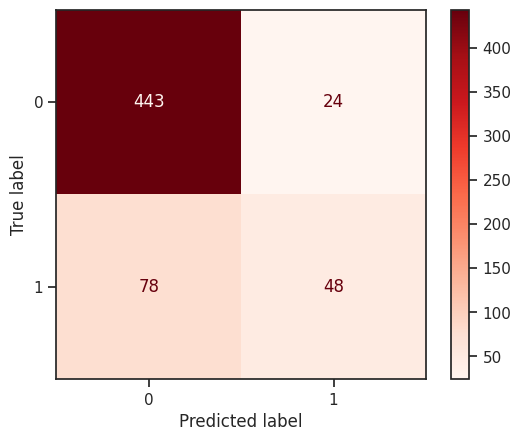

In [69]:
# SVM with Hyperparameter Evaluation
print("SVM with Hyperparameter Evaluation")

# Create and train the SVM model with hyperparameter tuning
svm_best = SVC(kernel='rbf', C=1, gamma='scale')
svm_best.fit(X_train_final, y_train)

# Make predictions on the test set using the best model
y_train_svm = svm_best.predict(X_train_final)
y_test_svm = svm_best.predict(X_test_final)

# Classification report for precision, recall, and F1 score
print('\nClassification Report on Train Set:\n', classification_report(y_train, y_train_svm))
print('\nClassification Report on Test Set:\n', classification_report(y_test, y_test_svm))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_best, X_test_final, y_test, cmap='Reds'))

In [70]:
all_reports = performance_report(all_reports, y_train, y_train_svm, y_test, y_test_svm, 'SVM MNanual Search')
pd.DataFrame(all_reports)

,SVM (Default Hyperparameter),SVM Grid Search
train - precision,0.774892,0.774892
train - recall,0.351670,0.351670
train - accuracy,0.838954,0.838954
train - f1_score,0.483784,0.483784
test - precision,0.666667,0.666667
test - recall,0.380952,0.380952
test - accuracy_score,0.827993,0.827993
test - f1_score,0.484848,0.484848


Insight :
* For SVM model with default parameter we got 83% for train and 82% for test set.

* For SVM model with hyperparameter tuning we got 83% prediction for train set and 82% for test set, but the result indicate an overfitting because the range of values ​​is to much different

# Model Saving

After carrying out the evaluation process on the model, it was found that the best model is Logistic Regression, this model will be tested using data inference.

In [71]:
#save model
with open("bestmodel_logreg.pkl", "wb") as f:
    pickle.dump(logreg_best, f)

#load model
with open('bestmodel_logreg.pkl', 'rb') as file:
     best_model = pickle.load(file)


# Model Inference

In [72]:
data_infernce

,limit_balance,age,bill_amt_1,pay_0_-2.0,pay_0_-1.0,pay_0_0.0,pay_0_1.0,pay_0_2.0,pay_0_3.0,pay_0_4.0,pay_0_5.0,pay_0_6.0,pay_0_7.0,pay_0_8.0
0,0.285714,0.145833,0.076532,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.181818,0.145833,0.021196,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.025974,0.583333,0.053631,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.181818,0.145833,0.073365,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.051948,0.416667,0.111892,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.246753,0.958333,0.021196,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.012987,0.541667,0.047984,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.090909,0.208333,0.170562,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.636364,0.208333,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.142857,0.500000,0.138531,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
# Check the shape of the training data
print('Training Data Shape:', X_train_final.shape)

# Check the shape of the inference data
print('Inference Data Shape:', data_infernce.shape)


Training Data Shape: (2372, 14)
Inference Data Shape: (10, 14)


In [74]:
# Predict using Linear Regression for data inference
y_pred_inf_log_reg = logreg_best.predict(data_infernce)
y_pred_inf_log_reg_fin = pd.DataFrame(y_pred_inf_log_reg, columns=['Pred-LOGREG-default_payment_next_month'])
y_pred_inf_log_reg_fin

,Pred-LOGREG-default_payment_next_month
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Conclusion



---



## Exploratory Data Analysis (EDA)

*  A significant majority (78.58%) of customers who use credit cards do not default on payments. This highlights an opportunity for targeted marketing strategies to encourage non-credit card users to adopt credit cards. This could involve promotional offers, benefits, or tailored campaigns to attract this segment.

* The visualization of gender reveals that the highest credit card usage is in the age group of 25 to 31 years. This could help in tailoring marketing efforts and product offerings to better appeal to the most engaged age groups.

* Among those classified as married, credit card transaction fees tend to be higher, suggesting a larger balance limit. This insight could inform credit limit adjustments and Consider targeted financial planning or credit management services for this group.



---



## Model Evaluation

In developing a classification model for predicting default_payment_next_month, Logistic Regression, KNN, and SVM algorithms were employed. To assess the model's performance, an evaluation was conducted using the Confusion Matrix metrics, including Accuracy, Precision, Recall, and F1-Score.
  - For Logistic Regression with default parameter we got 83% for train and 82% for test set. For Logistic Regression with grid search we got 83% prediction for train set and 82% for test set.

  - For KNN model default parameter we got 86% train and 79% test set, meanwhile KNN with hyperparameter got 85% on train set, 80% on test set.

  - For SVM model with hyperparameter tuning we got 83% prediction for train set and 82% for test set, but the result indicate an overfitting because the range of values ​​is to much different.

As a result, Logistic Regression emerged as the most effective algorithm. Because, Logreg model has balance between precision and recall along with a decent accuracy also simpler model with reasonable performance.



---

